In [1]:
import jqdatasdk as jq
import pandas as pd
import numpy as np

jq.auth('15011272962', 'u123456A')

提示：当前环境pandas版本为0.25，get_price与get_fundamentals_continuously接口panel参数将固定为False
注意：0.25以上版本pandas不支持panel，如使用该数据结构和相关函数请注意修改
auth success 


In [15]:
import time

def get_security(code, count=110):
    end_date = time.strftime("%Y-%m-%d", time.localtime())
    return jq.get_price(code, count=count, end_date=end_date, frequency='daily',
                        fields=['open', 'close', 'high', 'low', 'volume', 'money'])

In [20]:
df = get_security("300740.XSHE").tail(30)

close = df["close"]
print(close)

mavg = close.rolling(window=100).mean()

print(mavg)

2020-10-19    20.15
2020-10-20    20.55
2020-10-21    22.47
2020-10-22    22.55
2020-10-23    20.70
2020-10-26    20.30
2020-10-27    20.74
2020-10-28    20.01
2020-10-29    19.96
2020-10-30    18.64
2020-11-02    18.91
2020-11-03    19.03
2020-11-04    18.40
2020-11-05    19.03
2020-11-06    18.38
2020-11-09    18.71
2020-11-10    18.58
2020-11-11    17.43
2020-11-12    16.79
2020-11-13    16.49
2020-11-16    16.61
2020-11-17    16.60
2020-11-18    16.46
2020-11-19    16.37
2020-11-20    16.98
2020-11-23    16.74
2020-11-24    17.58
2020-11-25    17.00
2020-11-26    16.82
2020-11-27    16.75
Name: close, dtype: float64
2020-10-19   NaN
2020-10-20   NaN
2020-10-21   NaN
2020-10-22   NaN
2020-10-23   NaN
2020-10-26   NaN
2020-10-27   NaN
2020-10-28   NaN
2020-10-29   NaN
2020-10-30   NaN
2020-11-02   NaN
2020-11-03   NaN
2020-11-04   NaN
2020-11-05   NaN
2020-11-06   NaN
2020-11-09   NaN
2020-11-10   NaN
2020-11-11   NaN
2020-11-12   NaN
2020-11-13   NaN
2020-11-16   NaN
2020-11-17   Na

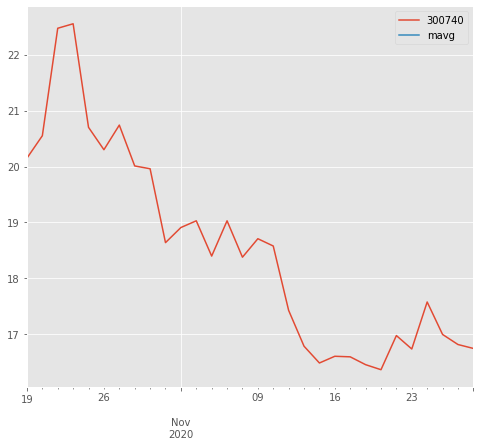

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib

import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))

mpl.__version__

# Adjusting the style of matplotlib

style.use('ggplot')

close.plot(label='300740')

mavg.plot(label='mavg')

plt.legend()

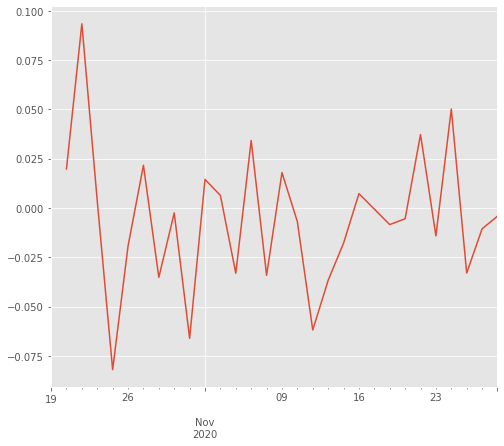

In [22]:
rets = close / close.shift(1) - 1

rets.plot(label='return')